# BANK CUSTOMER CHURN (ANALYSIS & PREDICTION)

## Project Description

Customer churn is one of the biggest fear of the banking industry as it results in revenue loss. When customers leave, it could mean that they are dissatisfied with the service, or that the competition has a better offer.

Customer Churn Analytics helps to determine the factors that leads to customers churning and proffer proactive solutions to reduce the churn.

- In this project, the bank customer churn data was collected from Kaggle and analyzed to find insight into the dynamics of customers churn and factors leading to attrition 

- Secondly, to build a model that will be used to predict customer churn


## Dataset Description

- RowNumber — corresponds to the record (row) number and has no effect on the output.
- CustomerId — contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography — a customer’s location can affect their decision to leave the bank.
- Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts —refers to the number of products that a customer has purchased through the bank.
- HasCrCard —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember —active customers are less likely to leave the bank.
- EstimatedSalary —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited —whether or not the customer left the bank.
- Complain —customer has complaint or not.
- Satisfaction Score —Score provided by the customer for their complaint resolution.
- Card Type —type of card hold by the customer.
- Points Earned —the points earned by the customer for using credit card.

## Load the Libraries

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_column', None)
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

## Data Wrangling

In [3]:
#display first five rows of the table
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#understanding the shape
df.shape

(10000, 18)

- There are 10,000 customers records and 18 variables(features)

In [5]:
#checking for missing values
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

- There are no missing values

In [6]:
#checking for duplicates
df.duplicated().sum()

0

- There are no duplcates in the record

In [7]:
#checking the datatypes
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

- The dataset contain float, integer and object data values

In [8]:
#counting the number of numerical value
df.select_dtypes(['float', 'int']).any().sum()

14

In [9]:
#counting the number of object variables
df.select_dtypes(['object']).any().sum()

4

#### Checking for unique values

In [10]:
#listing the categorical columns
df.select_dtypes(['object']).columns

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')

In [11]:
#counting the unique values in geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
#renaming Geography column to Country
df.rename(columns={
    'Geography': 'Country'
}, inplace=True)

In [13]:
#counting the unique values in gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#counting the unique values in Card Type
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [15]:
#listing out the numerical columns
num_var = []
for x in df.select_dtypes(['int', 'float']).columns:
    num_var.append(x)
num_var

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [17]:
#creating a numerical features excluding RowNumber and CustomerId
num_feat = num_var[2:]

In [18]:
#Calculating the descriptive statistics of the numerical columns
df[num_feat].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Feature Engineering

#### Create a copy of the dataframe for feature engineering and exploration

In [19]:
#creating a copy of the dataframe
df1 = df.copy()

In [20]:
#display first few lines
df1.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


### Mapping the columns to descriptive values

In [21]:
#Map HasCrCard column to Owned and Not Owned
map_dict1 = {
    1: 'Owned',
    0: 'Not Owned'
}
df1['HasCrCard'] = df1['HasCrCard'].map(map_dict1)

In [22]:
#confirming the columns has been mapped
df1['HasCrCard'].value_counts()

Owned        7055
Not Owned    2945
Name: HasCrCard, dtype: int64

In [23]:
#renaming the column IsActiveMember to Activity Status
df1.rename(columns={
    'IsActiveMember': 'Activity Status'
}, inplace=True)



# Map Activity Status to Active and Inactive
dict2 = {
    1: 'Active',
    0: 'Not Active'
}

df1['Activity Status'] = df1['Activity Status'].map(dict2)

In [24]:
#checking the Activity Status has been mapped
df1['Activity Status'].value_counts()

Active        5151
Not Active    4849
Name: Activity Status, dtype: int64

In [25]:
#dropping Estimated Salary since we have the account balance of customers
df1.drop('EstimatedSalary', axis=1, inplace=True)

In [26]:
#Renaming Exited to Churned Status
df1.rename(columns={
    'Exited': 'Churned Status'
}, inplace=True)


#maping the Churned Status to Churned and Not Churned
dict3 = {
    1: 'Churned',
    0: 'Not Churned'
}

df1['Churned Status'] = df1['Churned Status'].map(dict3)

In [27]:
#Checking the Churned Status has been mapped
df1['Churned Status'].value_counts()

Not Churned    7962
Churned        2038
Name: Churned Status, dtype: int64

In [28]:
#mapping Complain Column to Complained and No Complain
dict4 = {
    1: 'Complained',
    0: 'No Complain'
}
df1['Complain'] = df1['Complain'].map(dict4)

In [29]:
#checking the Complain column has been mapped
df1['Complain'].value_counts()

No Complain    7956
Complained     2044
Name: Complain, dtype: int64

In [30]:
#mapping Satisfaction Score
dict5 = {
    1: 'Very Unsatisfied',
    2: 'Unsatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

df1['Satisfaction Score'] = df1['Satisfaction Score'].map(dict5)

In [31]:
#checking the Satisfaction Score has been mapped
df1['Satisfaction Score'].value_counts()

Neutral             2042
Unsatisfied         2014
Satisfied           2008
Very Satisfied      2004
Very Unsatisfied    1932
Name: Satisfaction Score, dtype: int64

### Creating new columns **Act Balance**, **Age Group**, **Points Earned**, **Credit Score**

#### Creating Age Group column

In [32]:
#creating new column Age Group

#creating an empty list
age_grp = []

#creating a loop and append the value to age_grp
for x in df1['Age']:
    if x <= 20:
        age_grp.append('<= 20')
    elif x <= 30:
        age_grp.append('21 - 30')
    elif x <= 40:
        age_grp.append('31 - 40')
    elif x <= 50:
        age_grp.append('41 - 50')
    elif x <= 60:
        age_grp.append('51 - 60')
    elif x <= 70:
        age_grp.append('61 - 70')
    elif x > 70:
        age_grp.append('> 70')

df1['Age Group'] = age_grp

In [33]:
#confirming the Age Group have been mapped
df1['Age Group'].value_counts()

31 - 40    4451
41 - 50    2320
21 - 30    1879
51 - 60     797
61 - 70     331
> 70        133
<= 20        89
Name: Age Group, dtype: int64

#### Creating Act Balance Column

In [34]:
#creating new column Act Balance

#creating an empty list
acct_bal = []

#creating a loop and append the value to age_grp
for x in df1['Balance']:
    if x <= 10000:
        acct_bal.append('<= 10K')
    elif x <= 100000:
        acct_bal.append('10K - 100K')
    elif x <= 200000:
        acct_bal.append('100K - 200K')
    elif x > 200000:
        acct_bal.append('> 200K')



df1['Acct Balance'] = acct_bal

In [35]:
#confirming the column have been created
df1['Acct Balance'].value_counts()

100K - 200K    4765
<= 10K         3618
10K - 100K     1583
> 200K           34
Name: Acct Balance, dtype: int64

#### Creating a Point Earned Group column

In [36]:
#creating new column Points Earned Group

#creating an empty list
pt_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x >= 100 and x <= 200:
        pt_grp.append('100 - 200')
    elif x > 200 and x <= 300:
        pt_grp.append('201 - 300')
    elif x > 300 and x <= 400:
        pt_grp.append('301 - 400')
    elif x > 400 and x <= 500:
        pt_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        pt_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        pt_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        pt_grp.append('701 - 800')
    elif x > 800 and x <= 900:
        pt_grp.append('801 - 900')
    elif x > 900 and x <= 1000:
        pt_grp.append('901 - 1000')

#creating the point earned group column
df1['Point Earned Group'] = pt_grp

In [37]:
#confirming the column have been created
df1['Point Earned Group'].value_counts()

501 - 600     1350
701 - 800     1279
601 - 700     1274
301 - 400     1267
901 - 1000    1258
801 - 900     1243
401 - 500     1239
201 - 300     1088
100 - 200        2
Name: Point Earned Group, dtype: int64

#### Creating the Credit Score Group

In [38]:
#Creating the Credit Score Group

#creating an empty list
cr_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x <= 400:
        cr_grp.append('<= 400')
    elif x > 400 and x <= 500:
        cr_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        cr_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        cr_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        cr_grp.append('701 - 800')
    elif x > 800:
        cr_grp.append('> 800')

df1['Credit Score Group'] = cr_grp

In [39]:
#checking if the credit score group have been created
df1['Credit Score Group'].value_counts()

> 800        2501
<= 400       2357
501 - 600    1350
701 - 800    1279
601 - 700    1274
401 - 500    1239
Name: Credit Score Group, dtype: int64

## Data Exploration

### Univariate Exploration

#### Exploration of Distribution of  Gender, Card Type and Country

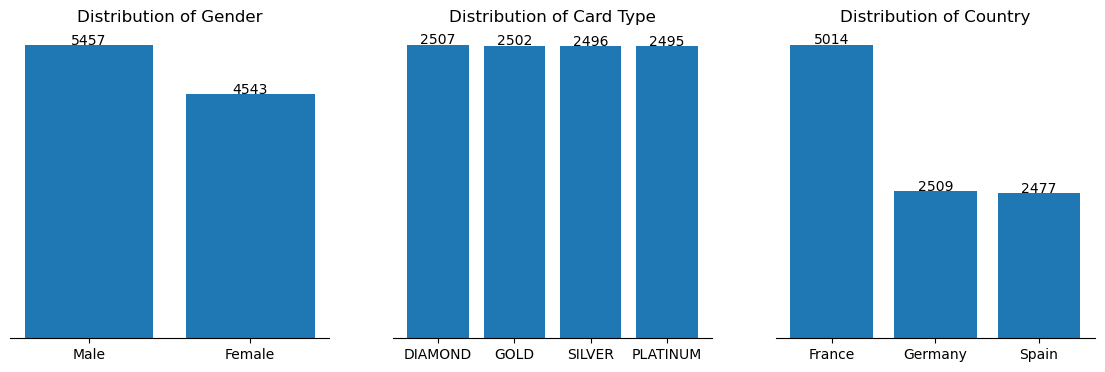

In [40]:
#Exploring the Categorical variables(Gender, Card Type, Country)
fig, ax = plt.subplots(1, 3, figsize=[14, 4])
ax[0].bar(x=df1['Gender'].value_counts().index, height=df1['Gender'].value_counts().values)
ax[1].bar(x=df1['Card Type'].value_counts().index, height=df1['Card Type'].value_counts().values)
ax[2].bar(x=df1['Country'].value_counts().index, height=df1['Country'].value_counts().values)

#removing spines
ax[0].spines[['left', 'right', 'top']].set_visible(False)
ax[1].spines[['left', 'right', 'top']].set_visible(False)
ax[2].spines[['left', 'right', 'top']].set_visible(False)

#remove the yaxis
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df1['Gender'].value_counts()):
    ax[0].annotate(values, xy=(index, values+70), ha='center', va='center')

for index, values in enumerate(df1['Card Type'].value_counts()):
    ax[1].annotate(values, xy=(index, values+39), ha='center', va='center')
    
for index, values in enumerate(df1['Country'].value_counts()):
    ax[2].annotate(values, xy=(index, values+80), ha='center', va='center')
    
#add title
ax[0].set_title('Distribution of Gender')
ax[1].set_title('Distribution of Card Type')
ax[2].set_title('Distribution of Country')
    
plt.show()

- The are 5,457 male and 4,543 females in the bank
- There is no much difference in the distribution of customers by the Card Type
- Based on the countries, France has two times the number of customers in Germany and Spain

#### Exploration of Distribution of Age Group and Churned Status

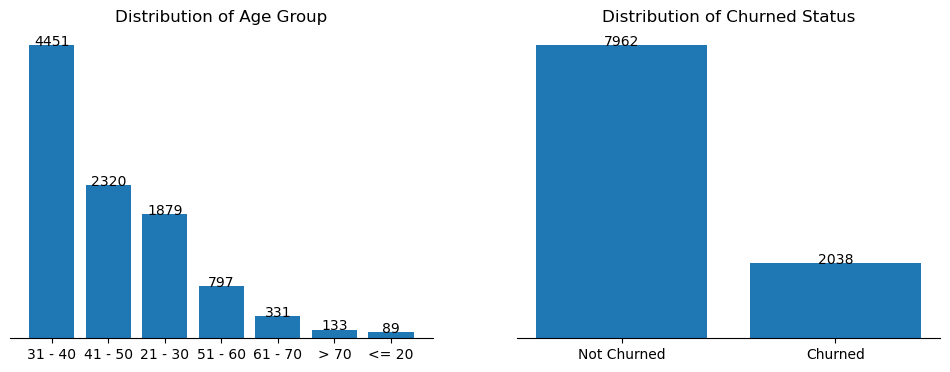

In [41]:
#exploring the Age Group and Churned Status

fig, ax = plt.subplots(1, 2, figsize=[12, 4])
ax[0].bar(x=df1['Age Group'].value_counts().index, height=df1['Age Group'].value_counts().values)
ax[1].bar(x=df1['Churned Status'].value_counts().index, height=df1['Churned Status'].value_counts().values)

#removing spines
ax[0].spines[['left', 'right', 'top']].set_visible(False)
ax[1].spines[['left', 'right', 'top']].set_visible(False)


#remove the yaxis
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df1['Age Group'].value_counts()):
    ax[0].annotate(values, xy=(index, values+50), ha='center', va='center')
#add annotation
for index, values in enumerate(df1['Churned Status'].value_counts()):
    ax[1].annotate(values, xy=(index, values+90), ha='center', va='center')

#add title
ax[0].set_title('Distribution of Age Group')
ax[1].set_title('Distribution of Churned Status')

plt.show()

- Majority of the bank customers lies in the age category of 31 - 40, followed by 41 - 50 age group
- About 2,038 customers of the bank were churned

## Data Analysis

### Total Customers

In [42]:
#Calculating total customers
total_customers = df1['CustomerId'].count()
total_customers

10000

### Total Churned Customers

In [43]:
#Creating the churn dataframe
churned_df = df1[df1['Churned Status']=='Churned']

In [44]:
#calculating total churn
total_churn = churned_df['CustomerId'].count()
total_churn

2038

### Churn Rate

In [45]:
#calculating the churn rate
churn_rate = ((total_churn/total_customers)*100).round(2)
churn_rate

20.38

## Churn Rate by Gender and Account Activity

### Summarize the data by Gender

In [46]:
#Summarize the data by Gender
gender_churn = df1.pivot_table(index='Gender', columns='Churned Status', values='CustomerId', aggfunc='count')
gender_churn

Churned Status,Churned,Not Churned
Gender,,
Female,1139,3404
Male,899,4558


In [47]:
#create the percentage churned and not churned for the gender
gender_churn['% Churned'] = round((gender_churn['Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)
gender_churn['% Not Churned'] = round((gender_churn['Not Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)
gender_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Gender,,,,
Female,1139,3404,25.1,74.9
Male,899,4558,16.5,83.5


### Summarize the data by Account Activity

In [48]:
#summarize the account activity
act_churn = df1.pivot_table(index='Activity Status', columns='Churned Status', values='CustomerId', aggfunc='count')
act_churn

Churned Status,Churned,Not Churned
Activity Status,,
Active,735,4416
Not Active,1303,3546


In [49]:
#creating percentage churn and not churn columns
act_churn['% Churned'] = round((act_churn['Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)
act_churn['% Not Churned'] = round((act_churn['Not Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)
act_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Activity Status,,,,
Active,735,4416,14.3,85.7
Not Active,1303,3546,26.9,73.1


#### Plotting a 100% Stacked Bar for the Total customers and Churn rate by Customer Satisfaction

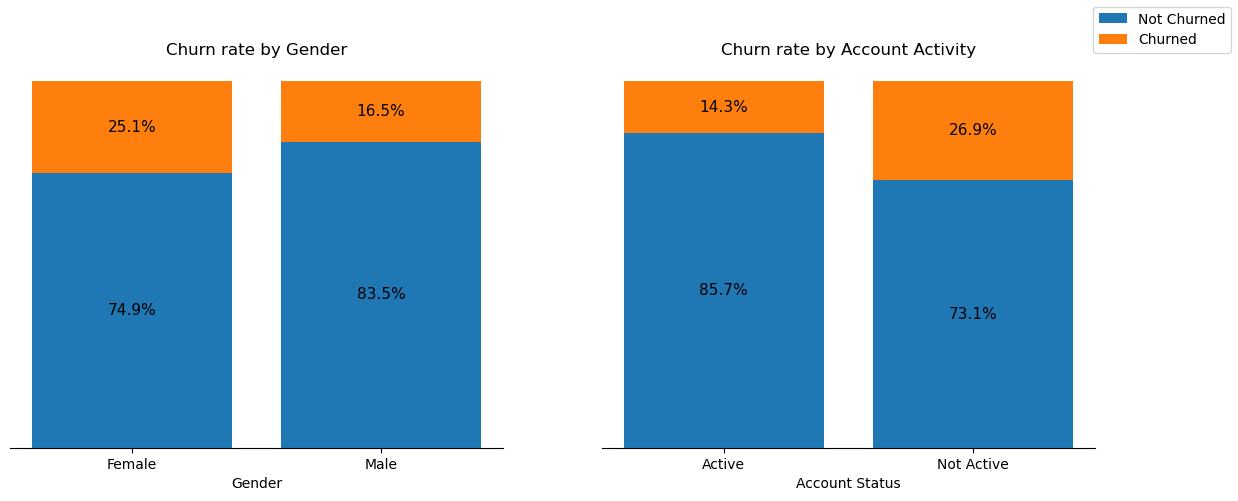

In [50]:
# Plot the Churn Rate by Gender and Account Activity
fig, ax = plt.subplots(1, 2, figsize=[14, 5])

ax[0].bar(gender_churn.index, gender_churn['% Not Churned'], label='Not Churned')
ax[0].bar(gender_churn.index, gender_churn['% Churned'], bottom=gender_churn['% Not Churned'], label='Churned')

ax[1].bar(act_churn.index, act_churn['% Not Churned'])

ax[1].bar(act_churn.index,
         act_churn['% Churned'],
         bottom=act_churn['% Not Churned'])

#add title, label
ax[0].set_title('Churn rate by Gender')
ax[1].set_title('Churn rate by Account Activity')
ax[0].set_xlabel('Gender')
ax[1].set_xlabel('Account Status')

#add annotation
for c in ax[0].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[0].bar_label(c,
               labels=labels,
               label_type='center',
               size=11)
for c in ax[1].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[1].bar_label(c,
               labels=labels,
               label_type='center',
               size=11)

#remove spines and axis
sns.despine(left=True)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)


fig.legend()
plt.show()

- About 25% of the Female were churn while only 16.5% of male left
- Churn rate(26.9%) was high for account that are inactive compared to active account which had about 14.3% 

## Churn Rate by Complain Status and Credit Card Users

#### Summarize the data by Complain Status

In [51]:
#summarize the data by complain
complain_churn = df1.pivot_table(index='Complain', columns='Churned Status', values='CustomerId', aggfunc='count')
complain_churn

Churned Status,Churned,Not Churned
Complain,,
Complained,2034,10
No Complain,4,7952


In [52]:
#creating percentage churn and not churn columns
complain_churn['% Churned'] = round((complain_churn['Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn['% Not Churned'] = round((complain_churn['Not Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Complain,,,,
Complained,2034,10,99.5,0.5
No Complain,4,7952,0.1,99.9


#### Summarize the data by Credit Card users

In [53]:
# Summarize the data by Credit Card users

card_churn = df1.pivot_table(index='HasCrCard', columns='Churned Status', values='CustomerId', aggfunc='count')
card_churn

Churned Status,Churned,Not Churned
HasCrCard,,
Not Owned,613,2332
Owned,1425,5630


In [54]:
#creating percentage churn and not churn columns
card_churn['% Churned'] = round((card_churn['Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn['% Not Churned'] = round((card_churn['Not Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
HasCrCard,,,,
Not Owned,613,2332,20.8,79.2
Owned,1425,5630,20.2,79.8


#### Plotting a 100% Stacked Bar for the Churn rate by Complain and Credit Card Users

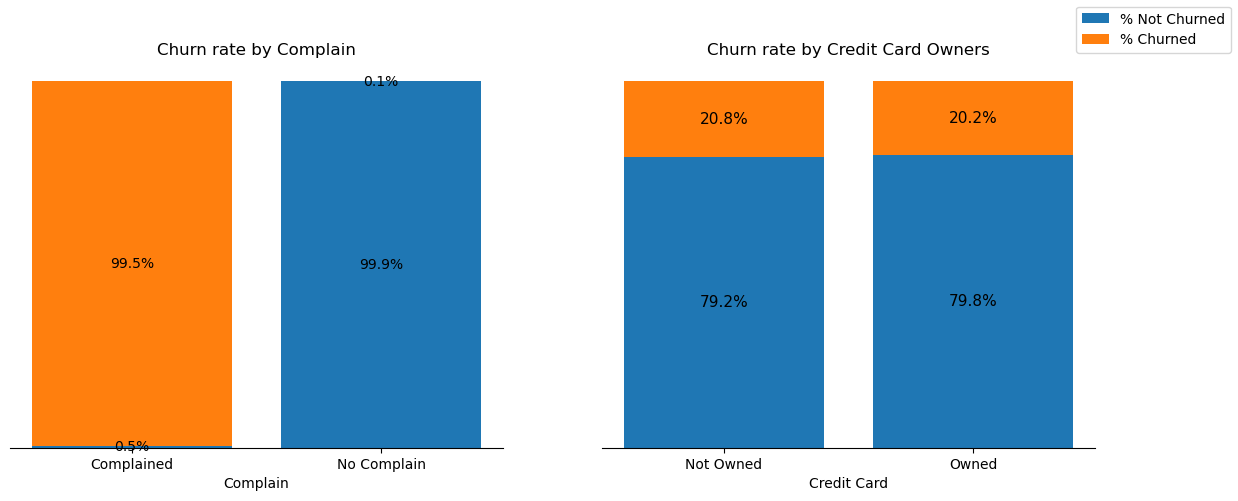

In [55]:
#plotting a 100% Stacked Bar for the Churn rate by Complain and credit card users

fig, ax = plt.subplots(1, 2, figsize=[14, 5])

ax[0].bar(complain_churn.index,
         complain_churn['% Not Churned'],
         label='% Not Churned')
ax[0].bar(complain_churn.index,
         complain_churn['% Churned'],
         label='% Churned',
         bottom=complain_churn['% Not Churned'])

ax[1].bar(card_churn.index,
         card_churn['% Not Churned'])
ax[1].bar(card_churn.index,
         card_churn['% Churned'],
         bottom=card_churn['% Not Churned'])


#add title, label
ax[0].set_title('Churn rate by Complain')
ax[1].set_title('Churn rate by Credit Card Owners')
ax[0].set_xlabel('Complain')
ax[1].set_xlabel('Credit Card')

#remove spines and axis
sns.despine(left=True)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

#add legend
fig.legend()


# add bar annotation
for c in ax[0].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[0].bar_label(c,
                   labels=labels,
                   size=10,
                   label_type='center')
for c in ax[1].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[1].bar_label(c,
                   labels=labels,
                   size=11,
                   label_type='center')

plt.show()

- Over 99% of disgruntled customers left the bank
- Churn rate is the same for customers who owned and did not own credit card

## Churn Rate by Country

#### Summarize the data by Country

In [56]:
#summarize the table by country and churn status
churn_country = df1.pivot_table(index='Country', columns='Churned Status', values='CustomerId', aggfunc='count')
churn_country

Churned Status,Churned,Not Churned
Country,,
France,811,4203
Germany,814,1695
Spain,413,2064


In [57]:
#create percentage churned and not churned
churn_country['% Churned'] = round((churn_country['Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country['% Not Churned'] = round((churn_country['Not Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Country,,,,
France,811,4203,16.2,83.8
Germany,814,1695,32.4,67.6
Spain,413,2064,16.7,83.3


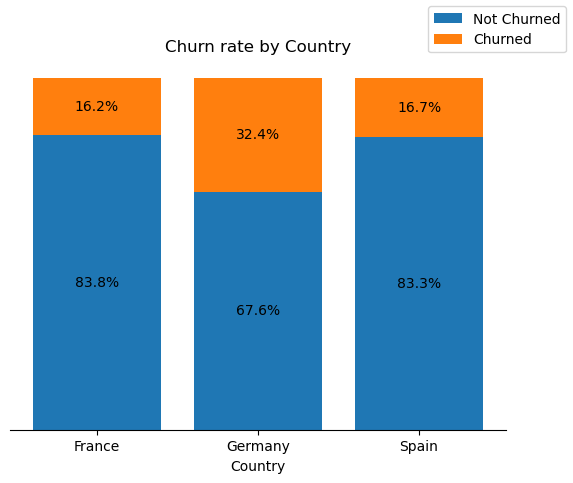

In [58]:
#plotting a 100% stacked bar chart of the percentage churn and not churn by country

fig, ax = plt.subplots()

ax.bar(churn_country.index, 
       churn_country['% Not Churned'],
      label = 'Not Churned')

ax.bar(churn_country.index,
      churn_country['% Churned'],
      label = 'Churned',
      bottom = churn_country['% Not Churned'])

for c in ax.containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

#add title, labels and legend
ax.set_title('Churn rate by Country')
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Country')
fig.legend()

#remove yticks, spines
ax.yaxis.set_visible(False)
sns.despine(left=True)
plt.show()

- Churn rate is high for customers in Germnay with about 32% but the same in France and Spain of about 16%

## Churn Rate by Age Group

In [59]:
#group the dataframe by Age group and count the total. This gives the total customers by Age Group
ag1 = df1.groupby(['Age Group'], as_index=False).agg(total=('CustomerId', 'count'))
ag1

,Age Group,total
0,21 - 30,1879
1,31 - 40,4451
2,41 - 50,2320
3,51 - 60,797
4,61 - 70,331
5,<= 20,89
6,> 70,133


In [60]:
#group the churned dataframe by Age group and count the total. This gives the total churn by age group
ag2 = churned_df.groupby('Age Group', as_index=False).agg(total_churn=('CustomerId', 'count'))
ag2

,Age Group,total_churn
0,21 - 30,143
1,31 - 40,539
2,41 - 50,788
3,51 - 60,448
4,61 - 70,104
5,<= 20,5
6,> 70,11


In [61]:
#merged the two dataframe based on the age group. This create a dataframe of age group with total customers and total churn
age_grp_merged = ag1.merge(ag2, how='inner', on='Age Group')
age_grp_merged

,Age Group,total,total_churn
0,21 - 30,1879,143
1,31 - 40,4451,539
2,41 - 50,2320,788
3,51 - 60,797,448
4,61 - 70,331,104
5,<= 20,89,5
6,> 70,133,11


In [62]:
#calculate the churn rate and create the column in the dataframe
age_grp_merged['churn_rate'] = round((age_grp_merged['total_churn']/age_grp_merged['total'])*100, 1)
age_grp_merged

,Age Group,total,total_churn,churn_rate
0,21 - 30,1879,143,7.6
1,31 - 40,4451,539,12.1
2,41 - 50,2320,788,34.0
3,51 - 60,797,448,56.2
4,61 - 70,331,104,31.4
5,<= 20,89,5,5.6
6,> 70,133,11,8.3


In [63]:
#create an index column for sorting the dataframe based on Age Group
age_grp_merged['index'] = age_grp_merged['Age Group']

#create a map dictionary
dict7 = {
    '<= 20': 1,
    '21 - 30': 2,
    '31 - 40': 3,
    '41 - 50': 4,
    '51 - 60': 5,
    '61 - 70': 6,
    '> 70': 7
}

#map the index to the dict7
age_grp_merged['index'] = age_grp_merged['index'].map(dict7)

In [64]:
#sort the dataframe using the index column
age_grp_merged = age_grp_merged.sort_values('index', ascending=True)
age_grp_merged

,Age Group,total,total_churn,churn_rate,index
5,<= 20,89,5,5.6,1
0,21 - 30,1879,143,7.6,2
1,31 - 40,4451,539,12.1,3
2,41 - 50,2320,788,34.0,4
3,51 - 60,797,448,56.2,5
4,61 - 70,331,104,31.4,6
6,> 70,133,11,8.3,7


In [65]:
#reorder the columns
age_grp_merged = age_grp_merged.reindex(labels=['index', 'Age Group', 'total','total_churn', 'churn_rate'], axis=1)
age_grp_merged

,index,Age Group,total,total_churn,churn_rate
5,1,<= 20,89,5,5.6
0,2,21 - 30,1879,143,7.6
1,3,31 - 40,4451,539,12.1
2,4,41 - 50,2320,788,34.0
3,5,51 - 60,797,448,56.2
4,6,61 - 70,331,104,31.4
6,7,> 70,133,11,8.3


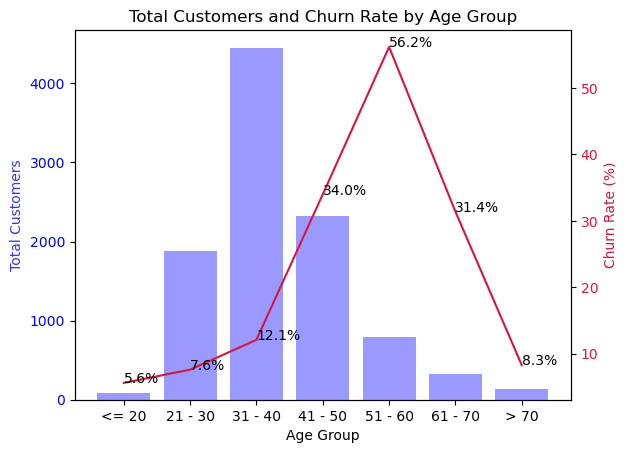

In [66]:
#Creating a dual plot of total customer and churn rate by Age group

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=age_grp_merged['Age Group'], height=age_grp_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Age Group') #add x_label
ax.set_title('Total Customers and Churn Rate by Age Group') #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(age_grp_merged['Age Group'], age_grp_merged['churn_rate'], color=color2)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(age_grp_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

- Customer churn is high for age group between 41 to 70 but peak at 56% for customers in the age category of 51 - 60

## Churn Rate by Acct Balance

In [67]:
#group by acct balance and get the total customers
act_bal_grp = df1.groupby(['Acct Balance'], as_index=False).agg(total=('CustomerId', 'count'))
act_bal_grp

,Acct Balance,total
0,100K - 200K,4765
1,10K - 100K,1583
2,<= 10K,3618
3,> 200K,34


In [68]:
#group the churned data by acct balance and get the total churned
churn_acct = churned_df.groupby(['Acct Balance'], as_index=False).agg(total_churn=('CustomerId', 'count'))
churn_acct

,Acct Balance,total_churn
0,100K - 200K,1192
1,10K - 100K,326
2,<= 10K,501
3,> 200K,19


In [69]:
#merged the two dataframe together
acct_bal_merged = act_bal_grp.merge(churn_acct, on='Acct Balance', how='inner')
acct_bal_merged

,Acct Balance,total,total_churn
0,100K - 200K,4765,1192
1,10K - 100K,1583,326
2,<= 10K,3618,501
3,> 200K,34,19


In [70]:
#add an index column for sorting the dataframe
acct_bal_merged['index'] = acct_bal_merged['Acct Balance']

#create a dictionary
dict8 = {
    '<= 10K': 1,
    '10K - 100K': 2,
    '100K - 200K': 3,
    '> 200K': 4
}

#map the dict to the index
acct_bal_merged['index'] = acct_bal_merged['index'].map(dict8)

In [71]:
acct_bal_merged

,Acct Balance,total,total_churn,index
0,100K - 200K,4765,1192,3
1,10K - 100K,1583,326,2
2,<= 10K,3618,501,1
3,> 200K,34,19,4


In [72]:
#sort the dataframe by indec
acct_bal_merged = acct_bal_merged.sort_values('index', ascending=True)
acct_bal_merged

,Acct Balance,total,total_churn,index
2,<= 10K,3618,501,1
1,10K - 100K,1583,326,2
0,100K - 200K,4765,1192,3
3,> 200K,34,19,4


In [73]:
#reorder the columns
acct_bal_merged = acct_bal_merged.reindex(labels=['index', 'Acct Balance', 'total', 'total_churn'], axis=1)
acct_bal_merged

,index,Acct Balance,total,total_churn
2,1,<= 10K,3618,501
1,2,10K - 100K,1583,326
0,3,100K - 200K,4765,1192
3,4,> 200K,34,19


In [74]:
#create a churn rate column
acct_bal_merged['churn_rate'] = round((acct_bal_merged['total_churn']/acct_bal_merged['total'])*100, 1)
acct_bal_merged

,index,Acct Balance,total,total_churn,churn_rate
2,1,<= 10K,3618,501,13.8
1,2,10K - 100K,1583,326,20.6
0,3,100K - 200K,4765,1192,25.0
3,4,> 200K,34,19,55.9


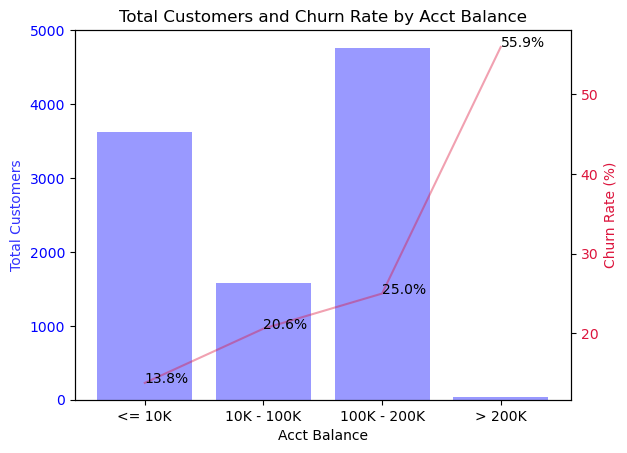

In [75]:
#Creating a dual plot of total customer and churn rate by Acct Balance

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=acct_bal_merged['Acct Balance'], height=acct_bal_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Acct Balance') #add x_label
ax.set_title('Total Customers and Churn Rate by Acct Balance') #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(acct_bal_merged['Acct Balance'], acct_bal_merged['churn_rate'], color=color2, alpha=0.4)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(acct_bal_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

- Churn rate for customers with more than $200,000 in their account. This means that these customers may not be happy with the serives or offers

## Churn Rate by Satisfaction

#### Summarize the data by Satisfaction

In [76]:
#summarize the data by satisfaction
sat_churn = df1.pivot_table(index='Satisfaction Score', columns='Churned Status', values='CustomerId', 
                            aggfunc='count', margins=True, margins_name='Total')
sat_churn

Churned Status,Churned,Not Churned,Total
Satisfaction Score,,,
Neutral,401,1641,2042
Satisfied,414,1594,2008
Unsatisfied,439,1575,2014
Very Satisfied,397,1607,2004
Very Unsatisfied,387,1545,1932
Total,2038,7962,10000


In [77]:
#create a churn rate column
sat_churn['Churn Rate'] = round((sat_churn['Churned']/sat_churn['Total'])*100, 1)
sat_churn

Churned Status,Churned,Not Churned,Total,Churn Rate
Satisfaction Score,,,,
Neutral,401,1641,2042,19.6
Satisfied,414,1594,2008,20.6
Unsatisfied,439,1575,2014,21.8
Very Satisfied,397,1607,2004,19.8
Very Unsatisfied,387,1545,1932,20.0
Total,2038,7962,10000,20.4


In [78]:
#drop unnecessary rows
sat_churn.drop('Total', axis=0, inplace=True)

In [79]:
#sort the dataframe by index
sat_churn = sat_churn.reindex(labels=['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'], axis=0)
sat_churn

Churned Status,Churned,Not Churned,Total,Churn Rate
Satisfaction Score,,,,
Very Unsatisfied,387,1545,1932,20.0
Unsatisfied,439,1575,2014,21.8
Neutral,401,1641,2042,19.6
Satisfied,414,1594,2008,20.6
Very Satisfied,397,1607,2004,19.8


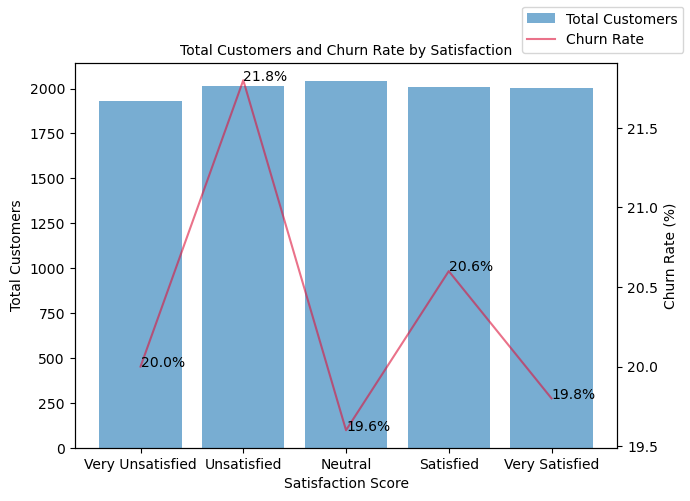

In [80]:
#plotting total customer and churn rate by Satisfaction
fig, ax = plt.subplots(figsize=[7, 5])

ax.bar(sat_churn.index, sat_churn['Total'], alpha=0.6, label='Total Customers')

ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(sat_churn.index, sat_churn['Churn Rate'], color = color2, alpha=0.6, label='Churn Rate')

#add title, label and legend
ax.set_title('Total Customers and Churn Rate by Satisfaction', size=10)
ax.set_xlabel('Satisfaction Score')
ax.set_ylabel('Total Customers')
ax1.set_ylabel('Churn Rate (%)')
fig.legend()

#add annotation to the line chart
for index, values in enumerate(sat_churn['Churn Rate']):
    ax1.text(index, values, str(values)+'%')

  
plt.show()

- About 21.8% of customers who were unsatisfied left, followed by 20.6% of those who were satisfied. This means satisfaction may not necessary impart churn

## Churn Rate by Tenure

#### Summarize the data by Tenure

In [81]:
#summarize the data by tenure
tenure_churn = df1.pivot_table(index='Tenure', columns='Churned Status', values='CustomerId', aggfunc='count', margins=True,
                              margins_name='Total')
tenure_churn

Churned Status,Churned,Not Churned,Total
Tenure,,,
0,95,318,413
1,232,803,1035
2,201,847,1048
3,213,796,1009
4,203,786,989
5,209,803,1012
6,196,771,967
7,177,851,1028
8,197,828,1025


In [82]:
#dropping the row total
tenure_churn.drop('Total', axis=0, inplace=True)

In [83]:
#creating the churn rate column
tenure_churn['Churn Rate'] = round((tenure_churn['Churned']/tenure_churn['Total'])*100, 1)
tenure_churn

Churned Status,Churned,Not Churned,Total,Churn Rate
Tenure,,,,
0,95,318,413,23.0
1,232,803,1035,22.4
2,201,847,1048,19.2
3,213,796,1009,21.1
4,203,786,989,20.5
5,209,803,1012,20.7
6,196,771,967,20.3
7,177,851,1028,17.2
8,197,828,1025,19.2


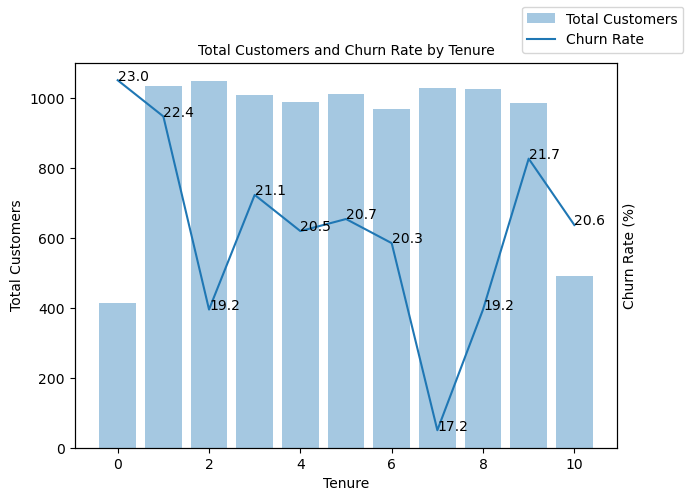

In [84]:
#plotting the total customers and churn rate
fig, ax = plt.subplots(figsize=[7,5])

ax.bar(x=tenure_churn.index,
      height=tenure_churn['Total'],
      label='Total Customers',
      alpha=0.4)

ax1 = ax.twinx()

ax1.plot(tenure_churn.index,
        tenure_churn['Churn Rate'],
        label='Churn Rate')

#add label, titile, remove spine
ax.set_title('Total Customers and Churn Rate by Tenure', size=10)
ax.set_ylabel('Total Customers')
ax1.set_ylabel('Churn Rate (%)')
ax.set_xlabel('Tenure')
fig.legend()

#remove tick on the second y axis
ax1.yaxis.set_ticks([])

#annotate the line chart
for index, value in enumerate(tenure_churn['Churn Rate']):
    ax1.text(index, value, str(value))

plt.show()

- Churn rate is high for customers who had been with the bank for less than 1 year. 
- Customers who had been with the bank for 9 and 10 years experience a substantial churn

## Churn Rate by Tenure and Satisfaction

In [85]:
#group the dataframe by Tenure and Satisfaction score
tsc1 = df1.groupby(['Tenure', 'Satisfaction Score'], as_index=False).agg(total_customers=('CustomerId', 'count'))

In [86]:
#group the churned dataframe by Tenure and Satisfaction score
tsc2 = churned_df.groupby(['Tenure', 'Satisfaction Score'], as_index=False).agg(total_churn=('CustomerId', 'count'))

In [87]:
#display first three rows of the dataframe
tsc1.head(3)

,Tenure,Satisfaction Score,total_customers
0,0,Neutral,75
1,0,Satisfied,76
2,0,Unsatisfied,85


In [88]:
#display first three rows of the dataframe
tsc2.head(3)

,Tenure,Satisfaction Score,total_churn
0,0,Neutral,19
1,0,Satisfied,21
2,0,Unsatisfied,19


In [89]:
#merged the two dataframe
merged_tsc = tsc1.merge(tsc2, how='inner', on=['Tenure', 'Satisfaction Score'])
merged_tsc.head(10)

,Tenure,Satisfaction Score,total_customers,total_churn
0,0,Neutral,75,19
1,0,Satisfied,76,21
2,0,Unsatisfied,85,19
3,0,Very Satisfied,90,18
4,0,Very Unsatisfied,87,18
5,1,Neutral,218,50
6,1,Satisfied,206,50
7,1,Unsatisfied,204,51
8,1,Very Satisfied,212,40
9,1,Very Unsatisfied,195,41


In [90]:
#calculate and add the churn rate column
merged_tsc['churn_rate'] = round((merged_tsc['total_churn']/merged_tsc['total_customers'])*100, 1)
merged_tsc.head(10)

,Tenure,Satisfaction Score,total_customers,total_churn,churn_rate
0,0,Neutral,75,19,25.3
1,0,Satisfied,76,21,27.6
2,0,Unsatisfied,85,19,22.4
3,0,Very Satisfied,90,18,20.0
4,0,Very Unsatisfied,87,18,20.7
5,1,Neutral,218,50,22.9
6,1,Satisfied,206,50,24.3
7,1,Unsatisfied,204,51,25.0
8,1,Very Satisfied,212,40,18.9
9,1,Very Unsatisfied,195,41,21.0


In [91]:
#create each dataframe by satisfaction

neutral_tsc = merged_tsc[merged_tsc['Satisfaction Score']=='Neutral']
very_unsatisfied_tsc = merged_tsc[merged_tsc['Satisfaction Score']=='Very Unsatisfied']
unsatisfied_tsc = merged_tsc[merged_tsc['Satisfaction Score']=='Unsatisfied']
satisfied_tsc = merged_tsc[merged_tsc['Satisfaction Score']=='Satisfied']
very_satisfied_tsc = merged_tsc[merged_tsc['Satisfaction Score']=='Very Satisfied']

In [92]:
#display one of the dataframe, Neutral Satisfaction
neutral_tsc

,Tenure,Satisfaction Score,total_customers,total_churn,churn_rate
0,0,Neutral,75,19,25.3
5,1,Neutral,218,50,22.9
10,2,Neutral,211,37,17.5
15,3,Neutral,197,47,23.9
20,4,Neutral,199,47,23.6
25,5,Neutral,198,33,16.7
30,6,Neutral,208,44,21.2
35,7,Neutral,198,28,14.1
40,8,Neutral,204,31,15.2
45,9,Neutral,229,50,21.8


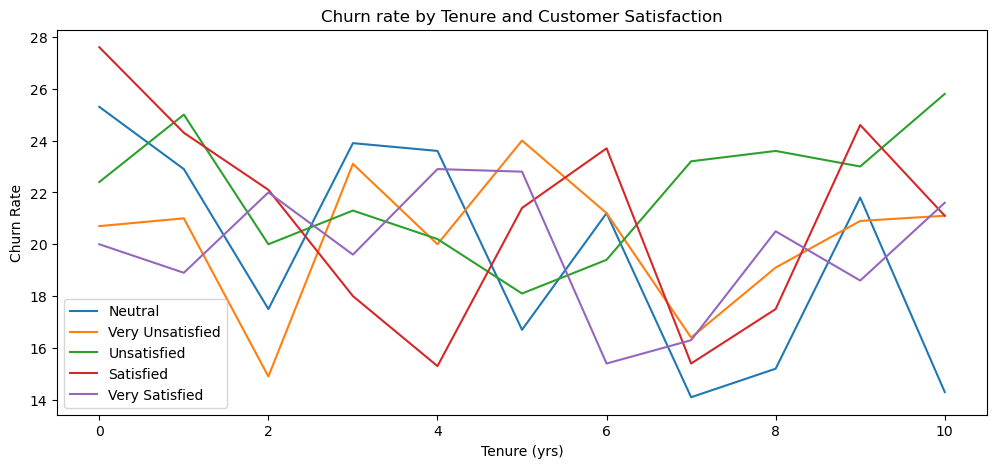

In [93]:
#plot a line chart of the churn rate by Tenure and Satisfaction

fig, ax = plt.subplots(figsize=[12, 5])

ax.plot(neutral_tsc['Tenure'],
       neutral_tsc['churn_rate'],
       label='Neutral')

ax.plot(very_unsatisfied_tsc['Tenure'],
       very_unsatisfied_tsc['churn_rate'],
       label='Very Unsatisfied')

ax.plot(unsatisfied_tsc['Tenure'],
       unsatisfied_tsc['churn_rate'],
       label='Unsatisfied')

ax.plot(satisfied_tsc['Tenure'],
       satisfied_tsc['churn_rate'],
       label='Satisfied')

ax.plot(very_satisfied_tsc['Tenure'],
       very_satisfied_tsc['churn_rate'],
       label='Very Satisfied')

#add legend, title, x_label and y_label
ax.set_title('Churn rate by Tenure and Customer Satisfaction')
ax.set_xlabel('Tenure (yrs)')
ax.set_ylabel('Churn Rate')
ax.legend()
plt.show()

- The line plot show that the churn rate is high for customers who were unsatisfied in the 7 to 10 years that they had been with the bank.
- This implies that the bank is losing their long terms customers who were unsatisfied with their services

## Churn Rate by Tenure and Account Balance

In [95]:
#group by Tenure and Account balance
tac = df1.groupby(['Tenure', 'Acct Balance'], as_index=False).agg(total_customers=('CustomerId', 'count'))
tac.head(10)

,Tenure,Acct Balance,total_customers
0,0,100K - 200K,206
1,0,10K - 100K,69
2,0,<= 10K,138
3,1,100K - 200K,510
4,1,10K - 100K,173
5,1,<= 10K,349
6,1,> 200K,3
7,2,100K - 200K,505
8,2,10K - 100K,156
9,2,<= 10K,382


In [102]:
#group the churn data by Tenure and Account Balance
tac1 = churned_df.groupby(['Tenure', 'Acct Balance'], as_index=False).agg(total_churn=('CustomerId', 'count'))
tac1.head(10)

,Tenure,Acct Balance,total_churn
0,0,100K - 200K,62
1,0,10K - 100K,12
2,0,<= 10K,21
3,1,100K - 200K,139
4,1,10K - 100K,32
5,1,<= 10K,59
6,1,> 200K,2
7,2,100K - 200K,108
8,2,10K - 100K,26
9,2,<= 10K,64


In [103]:
#checking the shape of the dataframe
tac.shape

(43, 3)

In [104]:
#checking the shape of the second dataframe
tac1.shape

(43, 3)

In [105]:
#merge the two dataframe
merged_tac = tac.merge(tac1, how='inner', on=['Tenure', 'Acct Balance'])
merged_tac.head(10)

,Tenure,Acct Balance,total_customers,total_churn
0,0,100K - 200K,206,62
1,0,10K - 100K,69,12
2,0,<= 10K,138,21
3,1,100K - 200K,510,139
4,1,10K - 100K,173,32
5,1,<= 10K,349,59
6,1,> 200K,3,2
7,2,100K - 200K,505,108
8,2,10K - 100K,156,26
9,2,<= 10K,382,64


In [106]:
#calculate the churn rate
merged_tac['churn_rate'] = round((merged_tac['total_churn']/merged_tac['total_customers'])*100, 1)
merged_tac.head()

,Tenure,Acct Balance,total_customers,total_churn,churn_rate
0,0,100K - 200K,206,62,30.1
1,0,10K - 100K,69,12,17.4
2,0,<= 10K,138,21,15.2
3,1,100K - 200K,510,139,27.3
4,1,10K - 100K,173,32,18.5


In [107]:
#getting each account balance dataframe
less_than_10K = merged_tac[merged_tac['Acct Balance']=='<= 10K']
btw_10K_100K = merged_tac[merged_tac['Acct Balance']=='10K - 100K']
btw_100K_200K = merged_tac[merged_tac['Acct Balance']=='100K - 200K']
greater_than_200K = merged_tac[merged_tac['Acct Balance']=='> 200K']

In [108]:
#confirming one of the dataframe created
btw_100K_200K

,Tenure,Acct Balance,total_customers,total_churn,churn_rate
0,0,100K - 200K,206,62,30.1
3,1,100K - 200K,510,139,27.3
7,2,100K - 200K,505,108,21.4
11,3,100K - 200K,487,120,24.6
15,4,100K - 200K,436,109,25.0
19,5,100K - 200K,473,120,25.4
23,6,100K - 200K,439,108,24.6
27,7,100K - 200K,491,106,21.6
31,8,100K - 200K,503,123,24.5
35,9,100K - 200K,490,140,28.6


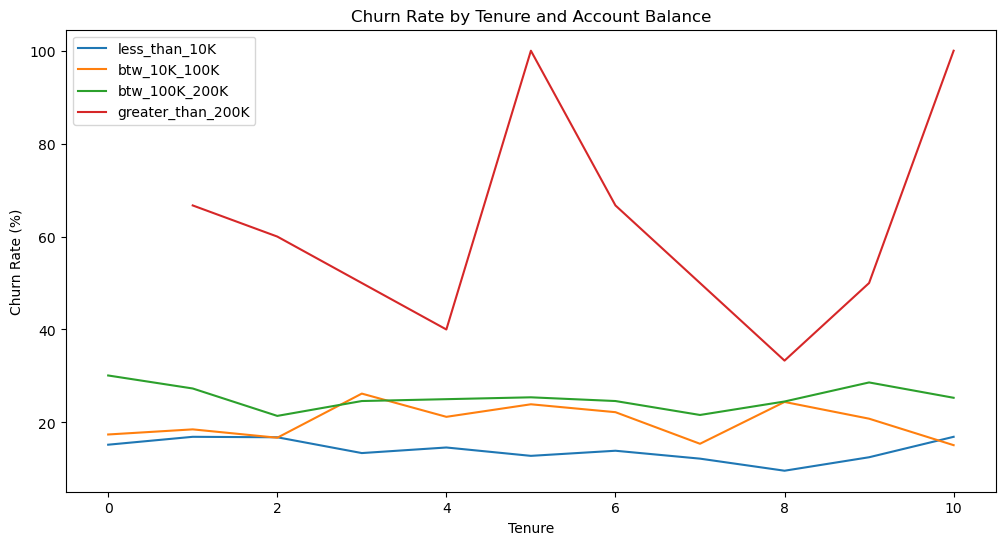

In [109]:
#plotting a linechart of the churn rate by Tenure and Acct Balance

fig, ax = plt.subplots(figsize=[12, 6])

ax.plot(less_than_10K['Tenure'],
       less_than_10K['churn_rate'],
       label='less_than_10K')

ax.plot(btw_10K_100K['Tenure'],
       btw_10K_100K['churn_rate'],
       label='btw_10K_100K')

ax.plot(btw_100K_200K['Tenure'],
       btw_100K_200K['churn_rate'],
       label='btw_100K_200K')

ax.plot(greater_than_200K['Tenure'],
       greater_than_200K['churn_rate'],
       label='greater_than_200K')

#add legend, title and label
ax.set_title('Churn Rate by Tenure and Account Balance')
ax.set_xlabel('Tenure')
ax.set_ylabel('Churn Rate (%)')
ax.legend()

plt.show()

- The chart show that the customers that have more than $200K in their account have higher churn rate across all tenures and peaked to 100% for customers who had stayed 10 years
- This implies the bank is losing high net-worth customers

## Data Preprocessing

In [112]:
#create a copy of the original data
df2 = df.copy()
df2.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [113]:
#drop unnecessary columns (RowNumber, CustomerId and EstimatedSalary)
df2.drop(['RowNumber', 'EstimatedSalary', 'CustomerId'], axis=1, inplace=True)
df2.head(3)

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,1,1,3,DIAMOND,377


### Detecting Outliers

Step 1- Using .describe()

In [121]:
df2[['Age', 'CreditScore', 'Balance', 'Point Earned']].describe()

,Age,CreditScore,Balance,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,76485.889288,606.515100
std,10.487806,96.653299,62397.405202,225.924839
min,18.000000,350.000000,0.000000,119.000000
25%,32.000000,584.000000,0.000000,410.000000
50%,37.000000,652.000000,97198.540000,605.000000
75%,44.000000,718.000000,127644.240000,801.000000
max,92.000000,850.000000,250898.090000,1000.000000


- minimum age is 18, while maximum is 92, while mean is 38

Step 2: Using Boxplot

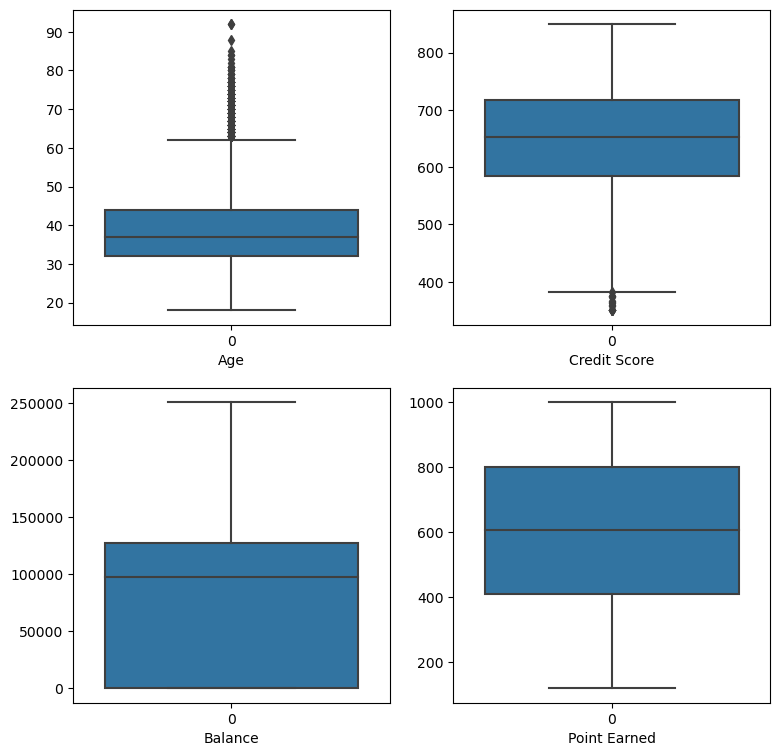

In [124]:
#plot a boxplot to detect outliers
fig, ax = plt.subplots(2, 2, figsize=[9,9])

sns.boxplot(df2['Age'], ax=ax[0,0])
sns.boxplot(df2['CreditScore'], ax=ax[0,1])
sns.boxplot(df2['Balance'], ax=ax[1,0])
sns.boxplot(df2['Point Earned'], ax=ax[1,1])

#add xlabel
ax[0,0].set_xlabel('Age')
ax[0,1].set_xlabel('Credit Score')
ax[1,0].set_xlabel('Balance')
ax[1,1].set_xlabel('Point Earned')
plt.show()

- The plots shows that there are outliers in Age and Credit Score

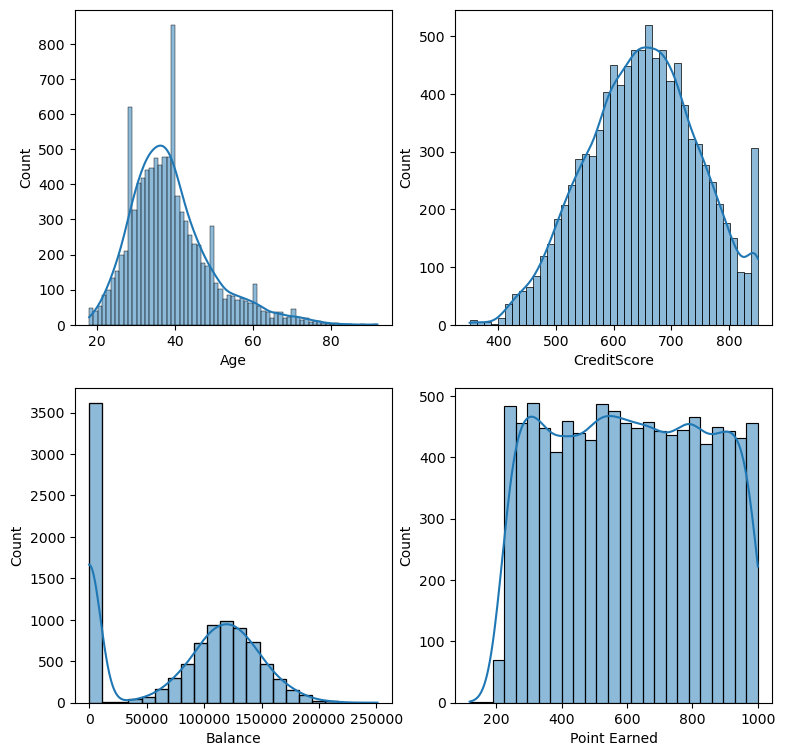

In [126]:
#plotting a histogram of the numerical variables

fig, ax = plt.subplots(2, 2, figsize=[9,9])


sns.histplot(df2['Age'], ax=ax[0,0], kde=True)
sns.histplot(df2['CreditScore'], ax=ax[0,1], kde=True)
sns.histplot(df2['Balance'], ax=ax[1,0], kde=True)
sns.histplot(df2['Point Earned'], ax=ax[1,1], kde=True)

plt.show()

- The minimum and maximum age is 18 and 90 respectively while the mean age 38. 
- The maximum is far greater than the mean which implies that 90 must be an outlier
- The age is skewed to the right, indicating the presence of outliers, so IQR technique will be used to handle the outlier instead of Z-score which is used to handle a normally distributed data

### Outlier removal using Inter-Quartile Range (IQR)

In [127]:
#using inter-quartile range to get the outliers

#define the Q1 and Q3
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)

#getting the IQR
IQR = Q3 - Q1

#setting the min_threshold and max_threshold
min_threshold = Q1 - (1.5*IQR)
max_threshold = Q3 + (1.5*IQR)

#getting the outliers
outlier_IQR = df2[(df2['Age']<min_threshold)|(df2['Age']>max_threshold)]
outlier_IQR

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
58,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1,1,5,SILVER,549
85,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,0,0,5,DIAMOND,651
104,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,1,1,2,GOLD,915
158,Maclean,646,France,Female,73,6,97259.25,1,0,1,0,0,1,PLATINUM,250
181,Hsia,510,France,Male,65,2,0.00,2,1,1,0,0,1,SILVER,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,0,0,2,DIAMOND,430
9765,Thomas,445,France,Male,64,2,136770.67,1,0,1,0,0,3,DIAMOND,650
9832,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,1,1,3,GOLD,808
9894,Vagin,521,France,Female,77,6,0.00,2,1,1,0,0,4,DIAMOND,366


In [128]:
#checking the maximum outlier value
outlier_IQR['Age'].max()

92

In [129]:
#check the minimum outlier value
outlier_IQR['Age'].min()

63

In [130]:
#check the length of the outlier
len(outlier_IQR)

359

- Since the length of the outlier is small, we can delete them or exclude them from the dataframe

In [132]:
#remove outlier and create a new dataframe

df2_no_outlier = df2[(df2['Age']>min_threshold)&(df2['Age']<max_threshold)]
df2_no_outlier

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,1,1,2,GOLD,339


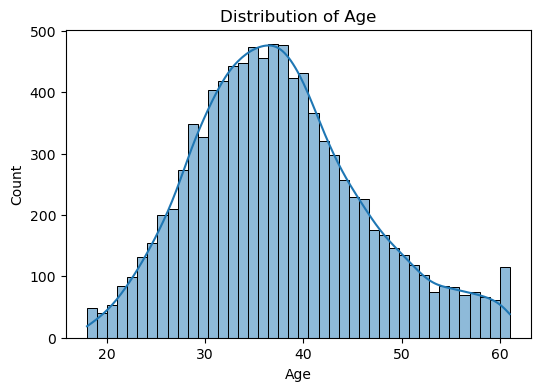

In [140]:
#plotting the Age distribution

fig, ax = plt.subplots(figsize=[6,4])


sns.histplot(df2_no_outlier['Age'], ax=ax, kde=True)
ax.set_title('Distribution of Age')

plt.show()

- The plot shows that the age is normally distributed and the outlier have been removed

### Outlier removal on the Credit Scores

In [143]:
#since the credit tends to be normally distributed, we will use the Z-score to find and remove the outliers

#we will exclude values that are below and above 3 standard deviation from the mean

#get the mean
cred_score_mean = df2_no_outlier['CreditScore'].mean()

#get the standard deviation
cred_score_std = df2_no_outlier['CreditScore'].std()

#define the lower and upper limits
lower_limit = cred_score_mean - (3*cred_score_std)
upper_limit = cred_score_mean + (3*cred_score_std)

#get the outlier
cred_score_outliers = df2_no_outlier[(df2_no_outlier['CreditScore']<lower_limit)|(df2_no_outlier['CreditScore']>upper_limit)]
cred_score_outliers

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
1405,Panicucci,359,France,Female,44,6,128747.69,1,1,0,1,1,1,PLATINUM,981
1631,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,1,1,3,SILVER,643
1838,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,1,1,2,GOLD,261
1962,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,1,1,4,SILVER,976
2473,Chou,351,Germany,Female,57,4,163146.46,1,1,0,1,1,4,SILVER,453
8723,Onyekachi,350,France,Male,51,10,0.00,1,1,1,1,1,4,GOLD,383
8762,Lin,350,France,Female,60,3,0.00,1,0,0,1,1,1,SILVER,958
9624,Maslow,350,France,Female,40,0,111098.85,1,1,1,1,1,2,DIAMOND,670


In [144]:
#checking the length of the outlier
len(cred_score_outliers)

8

In [146]:
#removing the outliers in the credit score

df2_no_outlier = df2_no_outlier[(df2_no_outlier['CreditScore']>lower_limit) & (df2_no_outlier['CreditScore']<upper_limit)]
df2_no_outlier

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,0,0,1,DIAMOND,300
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,0,0,5,PLATINUM,771
9997,Liu,709,France,Female,36,7,0.00,1,0,1,1,1,3,SILVER,564
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,1,1,2,GOLD,339


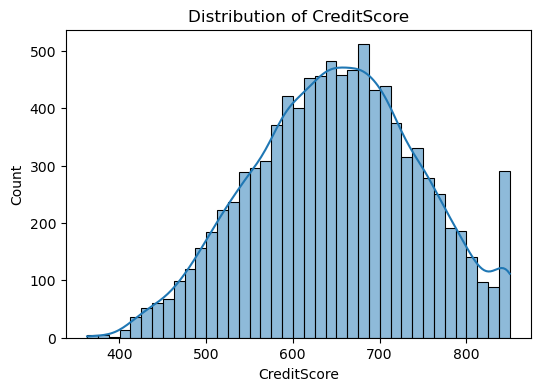

In [149]:
#plotting the Credit Score distribution

fig, ax = plt.subplots(figsize=[6,4])


sns.histplot(df2_no_outlier['CreditScore'], ax=ax, kde=True)
ax.set_title('Distribution of CreditScore')

plt.show()

## Data Preprocessing 2

In [152]:
#make of a copy of the dataframe
df3 = df2_no_outlier.copy()

In [154]:
#display few lines of the dataset
df3.head(3)

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,1,1,3,DIAMOND,377


In [155]:
#remove unnecessary columns
df3.drop('Surname', axis=1, inplace=True)
df3.head(3)

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,1,1,3,DIAMOND,377


In [159]:
#mapping Country categorical variable to integer
dict_country = {
    'France': 1,
    'Spain': 2,
    'Germany': 3
}

df3['Country'] = df3['Country'].map(dict_country)

In [160]:
df3['Country'].value_counts()

1    4804
3    2409
2    2368
Name: Country, dtype: int64

In [161]:
#mapping Gender categorical variable to integer
dict_gender = {
    'Male': 1,
    'Female':2
}

df3['Gender'] = df3['Gender'].map(dict_gender)

In [162]:
df3['Gender'].value_counts()

1    5233
2    4348
Name: Gender, dtype: int64

In [165]:
#displaying the unique values in the Card type
df3['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [166]:
#mapping Card Type to integer
dict_card = {
    'DIAMOND': 1,
    'GOLD': 2,
    'SILVER': 3,
    'PLATINUM': 4
}

df3['Card Type'] = df3['Card Type'].map(dict_card)

In [167]:
df3['Card Type'].value_counts()

3    2410
1    2409
4    2389
2    2373
Name: Card Type, dtype: int64

### Selecting X and y Features

In [170]:
#selecting input features
X = df3.drop('Exited', axis=1)

In [171]:
#display few rows of the input features
X.head(3)

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,2,42,2,0.00,1,1,1,1,2,1,464
1,608,2,2,41,1,83807.86,1,0,1,1,3,1,456
2,502,1,2,42,8,159660.80,3,1,0,1,3,1,377


In [172]:
#selecting the target feature
y = df3['Exited']

In [173]:
#display few rows of the target
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

## Dealing with imbalanced data

In [174]:
## Checking for imbalance dataset
y.value_counts()

0    7645
1    1936
Name: Exited, dtype: int64

- The dataset is imbalanced, with churned(1) being the minority class.

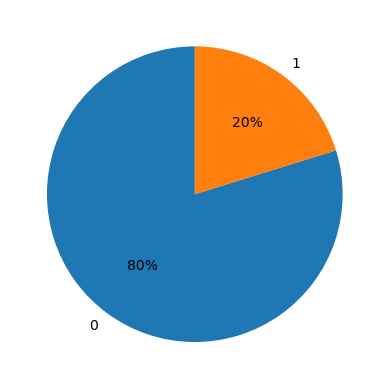

In [191]:
#plotting a piechart of the target variable
fig, ax = plt.subplots()

ax.pie(y.value_counts(), autopct='%.0f%%', labels=y.value_counts().index, startangle=90)

plt.show()

- The plot shows that the dataset is imbalanced for the target variable

### Handling Imbalanced data using SMOTE 

In [175]:
#import the SMOTE library
from imblearn.over_sampling import SMOTE

In [180]:
#instantiating the smote method
smote = SMOTE(sampling_strategy='minority')

In [181]:
#resampling using the smote
X_sm, y_sm = smote.fit_resample(X, y)

In [183]:
#checking the shape of X_sm
X_sm.shape

(15290, 13)

In [185]:
#checking the length of y_sm
len(y_sm)

15290

In [186]:
#checking the value counts for the resampled target
y_sm.value_counts()

1    7645
0    7645
Name: Exited, dtype: int64

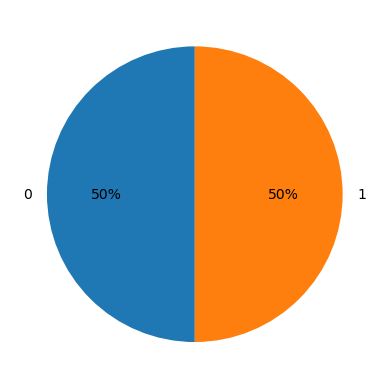

In [192]:
#plotting a piechart of the resampled target variable
fig, ax = plt.subplots()

ax.pie(y_sm.value_counts(), autopct='%.0f%%', labels=y.value_counts().index, startangle=90)

plt.show()

- The plot show that the dataset is now balance